# Predicting Car Prices

The project will involve the use of machine learinng agorithm (k-mean nearest neighbor algorithm) to predict a car's market price. The dataset used for the project has information on various cars such as the car's fuel type, motor's displacement, the weight of the car, the miles per gallon, the car's acceleration and so on. These attributes will be used to predict a car's market price. Information about the dataset is [here](https://archive.ics.uci.edu/ml/datasets/automobile) and the dataset can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

# Reading the dataset

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names = cols )
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Cleaning the numerical columns 

The columns in the dataset that will be used to predict the market price of a car are the dataset in the numerical columns. The columns will be cleaned and missing values will be replaced with the mean of each column. Also the data has to be rescaled to range between 0 and 1.

In [3]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
# Replacing all ? values with nan values

numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Converting the columns to float datatype and counting the number of nan values 

numeric_cars = numeric_cars.astype('float')
print(numeric_cars.isnull().sum())
numeric_cars.dtypes

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

The best option for replacing the missing values in the normalized-losses column and other columns is to replace the missing values with the mean of the column rather than droping the column or deleting the 41 rows with missing values. Since the price column is meant to be predicted nan values from the rows of price column will be removed.

In [6]:
numeric_cars = numeric_cars.dropna(subset=['price'])
print(numeric_cars.isnull().sum())
numeric_cars.head()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [7]:
# numeric_cars = numeric_cars.replace(np.nan, 0)
# numeric_cars = numeric_cars.apply(lambda x: x.fillna(x.mean()), axis=0)
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
print(numeric_cars.isnull().sum())
numeric_cars.head()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [8]:
# Normalizing the columns to range from 0 to 1 except the price column

# price_column = numeric_cars['price']
# def normalize(column):
#     return (column - column.min())/ (column.max() - column.min())

# numeric_cars = numeric_cars.apply(normalize, axis = 0)
# numeric_cars['price'] = price_column 

price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Modeling univariate k nearest neighbors models

Before exploring complex models using two or more variables that best predicts a car's market price the initial models will involve a single variable. The dataset will be split into training and test data set. The root mean square values for different k values will be compared to determine the best k value for a univariate model.

In [9]:
# Defining funtion for test and training 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    
    # defining a new k nearest neighbor object
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # randomizing the rows in the dataset and reindexing the rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # diving the dataset into half
    half_index = int(len(rand_df)/2)
    train_df = df.iloc[0:half_index]
    test_df = df.iloc[half_index:]
    
    # fitting the model to the training set
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # making predictions with the test set
    predicted_vals = knn.predict(test_df[[train_col]])
    
    # calculating the RMSE of the model
    mse = mean_squared_error(test_df[target_col], predicted_vals)
    rmse = np.sqrt(mse)
    return rmse
  

In [10]:
# displaying training results for all columns except the price column

rmse_results = {}
training_cols = numeric_cars.columns.drop('price')
print(training_cols)
    
for col in training_cols:
    rmse_results[col] = knn_train_test(col, 'price', numeric_cars)
rmse_series = pd.Series(rmse_results).sort_values()
rmse_series

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')


horsepower            4267.730361
highway-mpg           4628.793094
city-mpg              4814.778015
curb-weight           5166.828581
width                 7110.412630
compression-rate      8096.301512
normalized-losses     8131.436882
length                8304.189346
stroke                9334.714914
peak-rpm              9759.209970
wheel-base            9969.243292
height               10839.693636
bore                 13397.091693
dtype: float64

In [11]:
# Updating the above function to accept different k values

def knn_train_test(train_col, target_col, df):
    
    # defining a new k nearest neighbor object
    np.random.seed(1)
        
    # randomizing the rows in the dataset and reindexing the rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # diving the dataset into half
    half_index = int(len(rand_df)/2)
    train_df = df.iloc[0:half_index]
    test_df = df.iloc[half_index:]
    
    # list of k values
    k_values = [1, 3, 5, 7, 9]
    k_rmse = {}
    
    # fitting the model to the training set for k values 
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        # making predictions with the test set
        predicted_vals = knn.predict(test_df[[train_col]])
    
        # calculating the RMSE of the model
        mse = mean_squared_error(test_df[target_col], predicted_vals)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    
    return k_rmse

rmse_dict = {}
train_cols = numeric_cars.columns.drop('price')
    
for col in train_cols:
    rmse_dict[col] = knn_train_test(col, 'price', numeric_cars)
    
rmse_dict

{'bore': {1: 16502.858944335483,
  3: 13895.11178798717,
  5: 13397.091693481998,
  7: 11075.156453540423,
  9: 10178.905997122287},
 'city-mpg': {1: 5347.150261662008,
  3: 5210.2611302222185,
  5: 4814.77801484941,
  7: 4575.950005056604,
  9: 4770.344178922603},
 'compression-rate': {1: 8085.605142155501,
  3: 8137.969725694832,
  5: 8096.301512113387,
  7: 7896.692870779086,
  9: 7823.115528549677},
 'curb-weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'highway-mpg': {1: 5188.333470202142,
  3: 4655.081481516726,
  5: 4628.7930938146865,
  7: 4112.387802956751,
  9: 4029.9622707968324},
 'horsepower': {1: 7027.606971265131,
  3: 5400.929793235897,
  5: 4267.730361029788,
  7: 3821.376566368764,
  9: 3461.132024333479},
 'length': {1: 10053.579063701594,
  3: 8230.050

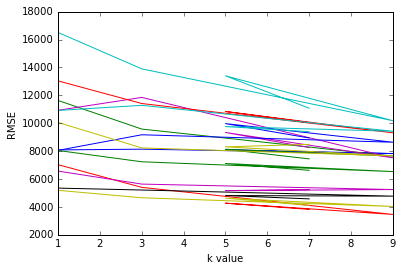

In [12]:
# Plotting the RMSE for k values

import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.show()

From the plot the k value that gives the lowest RMSE is 5 for the features of the univariate model. The error however is high and more features will be used in building a better model in the next step of the project.

# Modeling multivariate k nearest neighbors models

The train test funtion below is modified to accept a list of columns to generate a multivariate k nearest neighbor model using the default k value. First the average RMSE value for each feature using different k values is determined to know the best features from the above model.

In [13]:
# determining the best features from differnt k values

feature_avg_rmse = {}
for k,v in rmse_dict.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

highway-mpg           4522.911624
horsepower            4795.755143
city-mpg              4943.696718
curb-weight           5570.589864
width                 7108.476258
compression-rate      8007.936956
length                8545.374123
normalized-losses     8885.006588
wheel-base            8953.712114
stroke                9576.240416
peak-rpm             10154.303501
height               10927.529704
bore                 13009.824975
dtype: float64

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_cols, target_col, df):
    
    # defining a new k nearest neighbor object
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # randomizing the rows in the dataset and reindexing the rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # diving the dataset into half
    half_index = int(len(rand_df)/2)
    train_df = df.iloc[0:half_index]
    test_df = df.iloc[half_index:]
    
       
    # fitting the model to the training set
    knn.fit(train_df[train_cols], train_df[target_col])
    
    # making predictions with the test set
    predicted_vals = knn.predict(test_df[train_cols])
    
    # calculating the RMSE of the model
    mse = mean_squared_error(test_df[target_col], predicted_vals)
    rmse = np.sqrt(mse)
            
    return rmse
  

In [15]:
# Testing the multivariate model

def_rmse_results = {}

best_2_features = ['highway-mpg', 'horsepower']
rmse_val = knn_train_test(best_2_features, 'price', numeric_cars)
def_rmse_results['best_2_features'] = rmse_val

best_3_features = ['highway-mpg', 'horsepower', 'city-mpg']
rmse_val = knn_train_test(best_3_features, 'price', numeric_cars)
def_rmse_results['best_3_features'] = rmse_val

best_4_features = ['highway-mpg', 'horsepower', 'city-mpg', 'curb-weight']
rmse_val = knn_train_test(best_4_features, 'price', numeric_cars)
def_rmse_results['best_4_features'] = rmse_val

best_5_features = ['highway-mpg', 'horsepower', 'city-mpg', 'curb-weight', 'width']
rmse_val = knn_train_test(best_5_features, 'price', numeric_cars)
def_rmse_results['best_5_features'] = rmse_val

def_rmse_results

{'best_2_features': 3325.4272035840195,
 'best_3_features': 3836.2190466475436,
 'best_4_features': 3998.051352475315,
 'best_5_features': 4479.405697497412}

Using the default k value has better result such that the top five features from the univariate model produce lower RMSEs when combined as features for a multivariate model compared to just modeling using a single feature. The k values will be varied in the next step and the top three models from above will be used to determine the optimal k value to use for a multivariate model.

In [16]:
def knn_train_test(train_cols, target_col, df):
    
    # defining a new k nearest neighbor object
    
    np.random.seed(1)
        
    # randomizing the rows in the dataset and reindexing the rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # diving the dataset into half
    half_index = int(len(rand_df)/2)
    train_df = df.iloc[0:half_index]
    test_df = df.iloc[half_index:]
    
    # varying the hyperparameter value from 1 to 25
    k_vals = list(range(1,26,1))
    k_rmses = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors = k)
    
        # fitting the model to the training set
        knn.fit(train_df[train_cols], train_df[target_col])
    
        # making predictions with the test set
        predicted_vals = knn.predict(test_df[train_cols])
    
        # calculating the RMSE of the model
        mse = mean_squared_error(test_df[target_col], predicted_vals)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
            
    return k_rmses
  
# testing the above model

k_rmse_results = {}

best_2_features = ['highway-mpg', 'horsepower']
rmse_val = knn_train_test(best_2_features, 'price', numeric_cars)
k_rmse_results['best_2_features'] = rmse_val

best_3_features = ['highway-mpg', 'horsepower', 'city-mpg']
rmse_val = knn_train_test(best_3_features, 'price', numeric_cars)
k_rmse_results['best_3_features'] = rmse_val

best_4_features = ['highway-mpg', 'horsepower', 'city-mpg', 'curb-weight']
rmse_val = knn_train_test(best_4_features, 'price', numeric_cars)
k_rmse_results['best_4_features'] = rmse_val

k_rmse_results

{'best_2_features': {1: 3352.5396830958875,
  2: 3496.683218734322,
  3: 3595.427023115315,
  4: 3226.9983751150307,
  5: 3325.4272035840195,
  6: 3152.524368520315,
  7: 3255.6023255492437,
  8: 3195.652677775545,
  9: 2989.7395065584146,
  10: 2899.270143407724,
  11: 2940.0260529954417,
  12: 3204.2355112514606,
  13: 3397.437436403872,
  14: 3571.519694969051,
  15: 3700.1924809446878,
  16: 3625.418594147343,
  17: 3643.3617846343423,
  18: 3756.7533468070365,
  19: 3869.7768983353108,
  20: 3973.095219213931,
  21: 4055.168745253363,
  22: 4079.7381204526487,
  23: 4109.610639173429,
  24: 4139.513228817524,
  25: 4164.506602730049},
 'best_3_features': {1: 3954.189402606199,
  2: 3999.8683310631095,
  3: 4144.457443315101,
  4: 3926.2456232776535,
  5: 3836.2190466475436,
  6: 3607.656472846688,
  7: 3628.4741443039106,
  8: 3610.491165123439,
  9: 3547.8812454571416,
  10: 3308.574061988543,
  11: 3155.8393769557706,
  12: 3319.1278227646467,
  13: 3507.8615115404286,
  14: 360

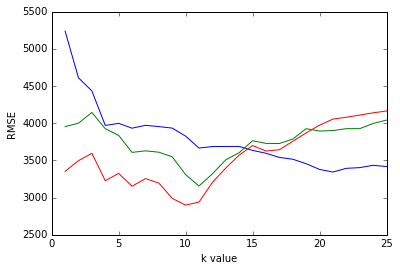

In [17]:
# plotting the k values with their corresponding RMSE values for the top 3 models

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.show()

From the top three multivariate models the optimal k value is 10 with the lowest RMSE just below 3000. 

# Conclusion

From the model building using the dataset for feature selection the best k means nearest neighbor model for predicting a particular car's price is a model with 4 features and a k value of 10. The most significant features for the model are the car's highway miles per gallon its horsepower its city miles per gallon and its curb weight. 